In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

y_binary = (y > np.median(y)).astype(int)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

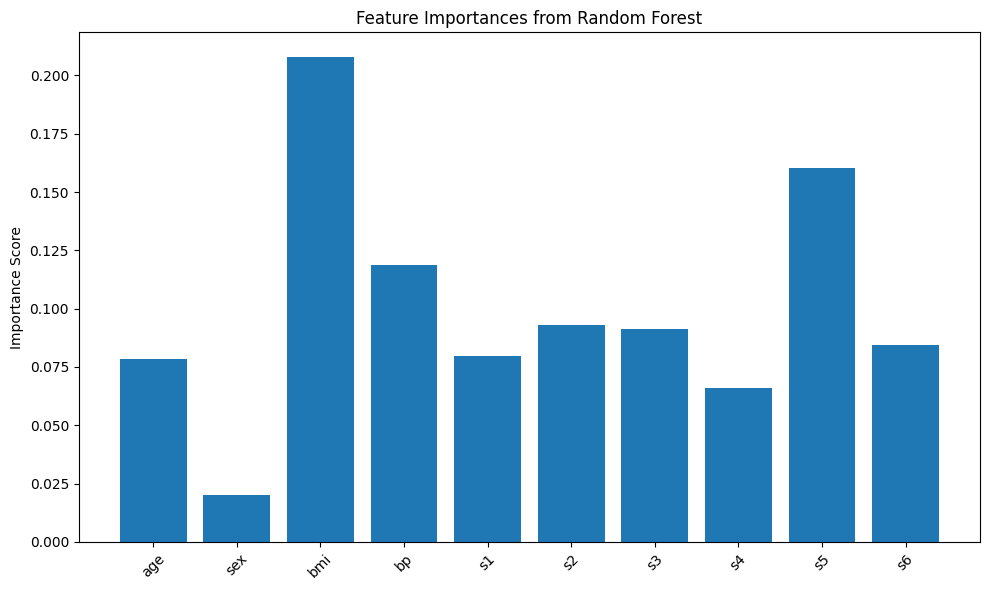

In [3]:
importances = clf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

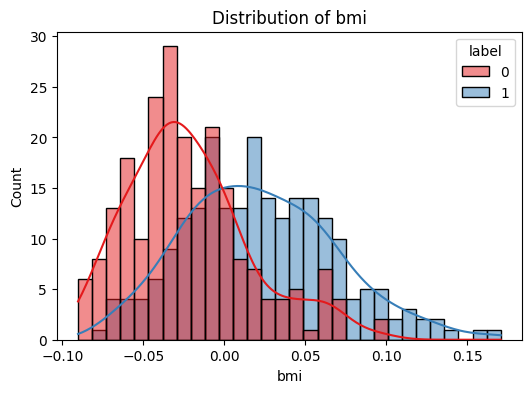

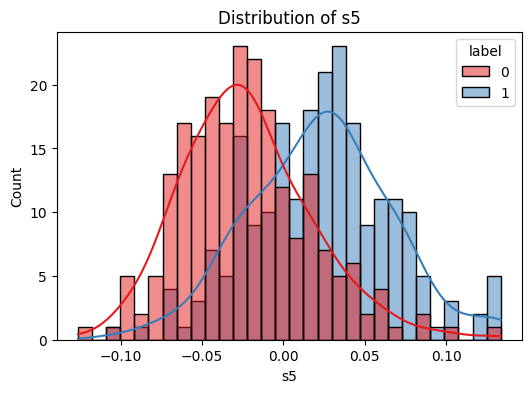

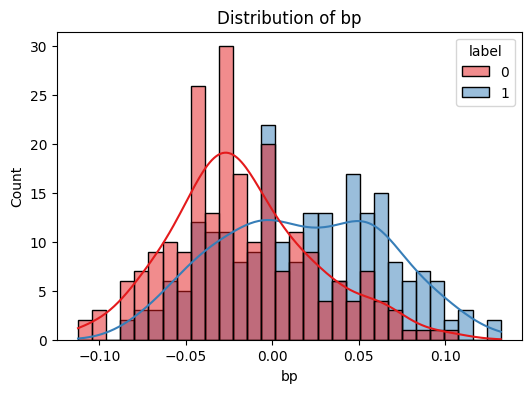

In [4]:
# Get top 3 features
top_features = np.argsort(importances)[-3:][::-1]
top_names = X.columns[top_features]

# Add label for plotting
X_plot = X.copy()
X_plot['label'] = y_binary

# Plot histograms
for feat in top_names:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=X_plot, x=feat, hue='label', bins=30, kde=True, palette='Set1')
    plt.title(f"Distribution of {feat}")
    plt.show()


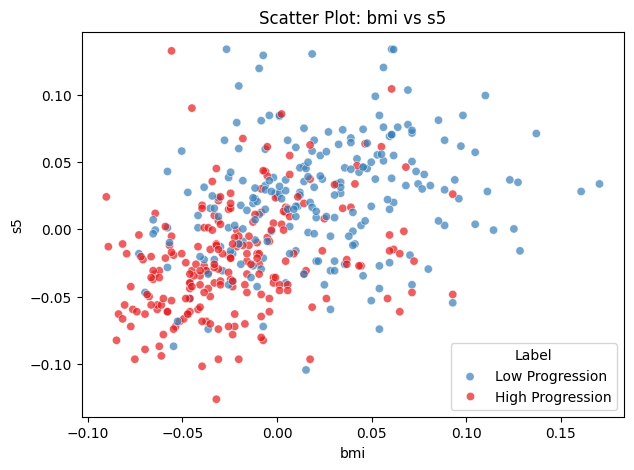

In [5]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_plot[top_names[0]],
    y=X_plot[top_names[1]],
    hue=X_plot['label'],
    palette='Set1',
    alpha=0.7
)
plt.title(f"Scatter Plot: {top_names[0]} vs {top_names[1]}")
plt.xlabel(top_names[0])
plt.ylabel(top_names[1])
plt.legend(title='Label', labels=['Low Progression', 'High Progression'])
plt.show()
